In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
%matplotlib inline

In [2]:
shg_df=pd.read_csv('SHG_converted.csv')

In [3]:
shg_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
0,5,3,15000.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,0,0,1,1,1,3
1,3,3,30000.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,0,0,0,0,0,1,1,1,3,2
2,2,3,30000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,1,1,0,0,1,1,1,1,3,2
3,5,2,15000.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,0,1,0,0,0,0,1,1,1,1
4,3,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,0,0,0,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,1,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,1,1,3,3
4382,7,3,13850.0,0.0,0.0,0.0,0.0,1.0,0.0,2,...,0,1,0,0,0,1,1,1,2,2
4383,2,3,50000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,1,0,0,0,1,1,1,3,3
4384,3,3,32000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,1,1,1,1,1


### Caste vs Loan number

In [11]:
shg_df.Total_no_of_loans.describe()

count    4386.000000
mean        1.989056
std         1.757958
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        18.000000
Name: Total_no_of_loans, dtype: float64

In [14]:
shg_df.shape

(4386, 116)

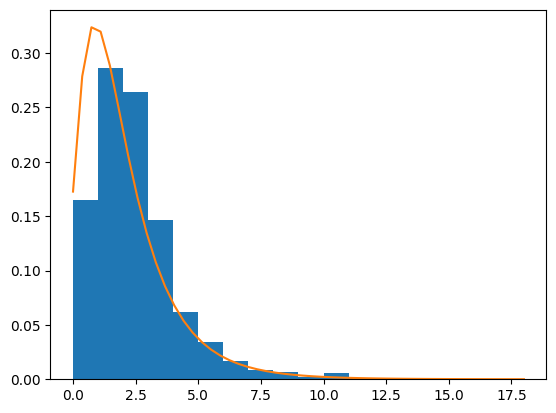

In [41]:
#finding the distribution of total_no_of_loans
plt.hist(shg_df.Total_no_of_loans,bins=18,density=True)
[s_fit,loc_fit,scale_fit]=stats.lognorm.fit(shg_df.Total_no_of_loans)
x=np.linspace(np.min(shg_df.Total_no_of_loans), np.max(shg_df.Total_no_of_loans))
plt.plot(x, stats.lognorm.pdf(x, s_fit, loc_fit, scale_fit))
plt.show()

In [90]:
shg_df.groupby('Total_no_of_loans')[['Total_no_of_loans']].count()

,Total_no_of_loans
Total_no_of_loans,
0,721
1,1257
2,1160
3,644
4,273
5,150
6,73
7,36
8,28


We can see that the column `Total_no_of_loans` is a discrete variable, and not a continuous variable.

<AxesSubplot: xlabel='Caste_Category', ylabel='Total_no_of_loans'>

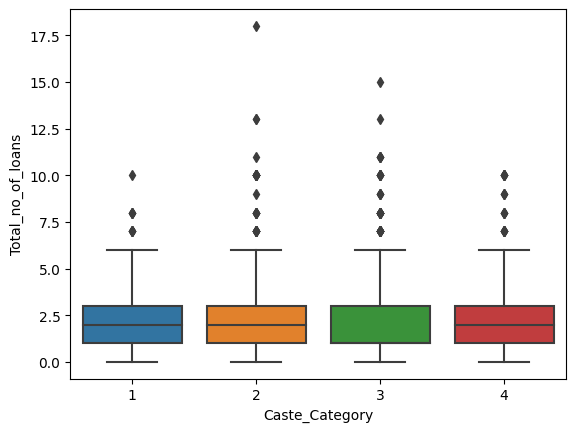

In [35]:
sns.boxplot(x='Caste_Category', y='Total_no_of_loans',data=shg_df)

In [29]:
stats.kruskal(shg_df.Total_no_of_loans,shg_df.Caste_Category)

KruskalResult(statistic=382.16506224088016, pvalue=4.203360623592244e-85)

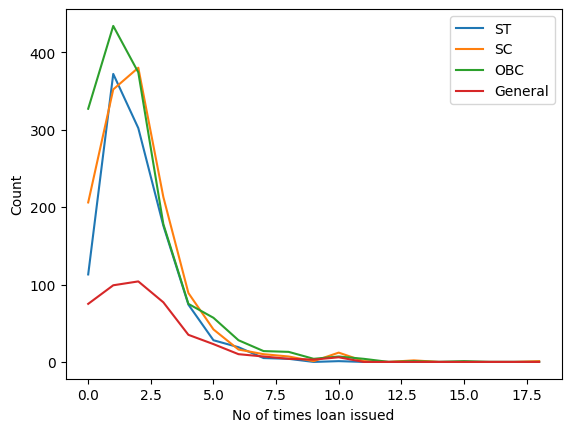

In [88]:
x=np.arange(0,19)
caste1=[113,372,302,176,74,28,19,5,4,0,1,0,0,0,0,0,0,0,0]
caste2=[206,352,380,213,89,42,16,10,7,1,12,1,0,2,0,0,0,0,1]
caste3=[327,434,374,178,75,57,28,14,13,4,7,4,0,1,0,1,0,0,0]
caste4=[75,99,104,77,35,23,10,7,4,3,6,0,0,0,0,0,0,0,0]
plt.plot(x,caste1)
plt.plot(x,caste2)
plt.plot(x,caste3)
plt.plot(x,caste4)
plt.xlabel('No of times loan issued')
plt.ylabel('Count')
plt.legend(['ST','SC','OBC','General'])
plt.show()

### Caste vs Income

In [91]:
stats.kruskal(shg_df.yearly_income,shg_df.Caste_Category)

KruskalResult(statistic=3909.253834296694, pvalue=0.0)

In [92]:
pg.anova(data=shg_df,dv='yearly_income',between='Caste_Category')

,Source,ddof1,ddof2,F,p-unc,np2
0,Caste_Category,3,4382,39.422229,3.939576e-25,0.02628


In [94]:
stats.normaltest(shg_df.Total_no_of_loans)

NormaltestResult(statistic=1835.6309395060698, pvalue=0.0)

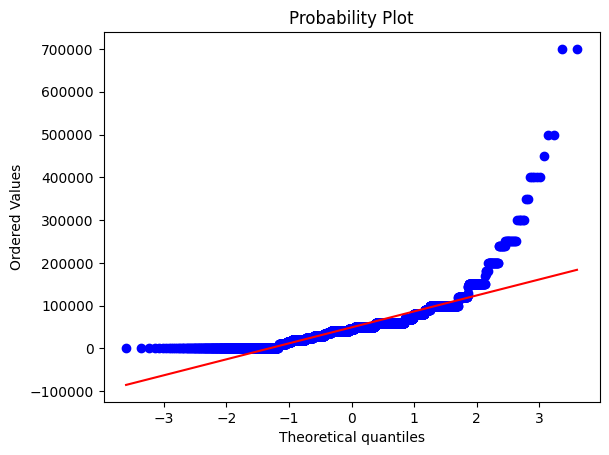

In [97]:
stats.probplot(shg_df.yearly_income, dist="norm", plot=plt)
plt.show()

### Caste vs Total Loan

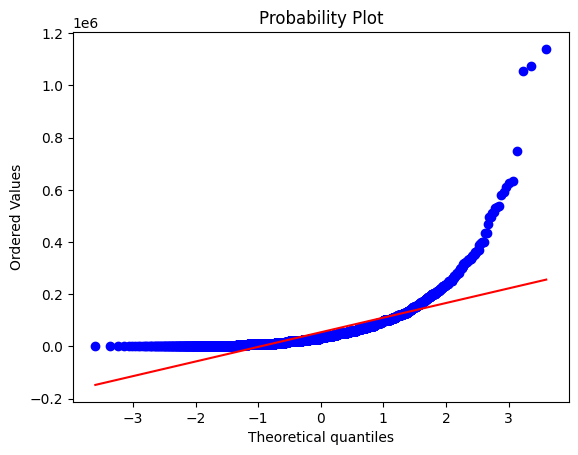

In [148]:
stats.probplot(shg_df.Total_loan_amt, dist="norm",plot=plt)
plt.show()

In [150]:
stats.normaltest(shg_df.Total_loan_amt)

NormaltestResult(statistic=4410.784363754889, pvalue=0.0)

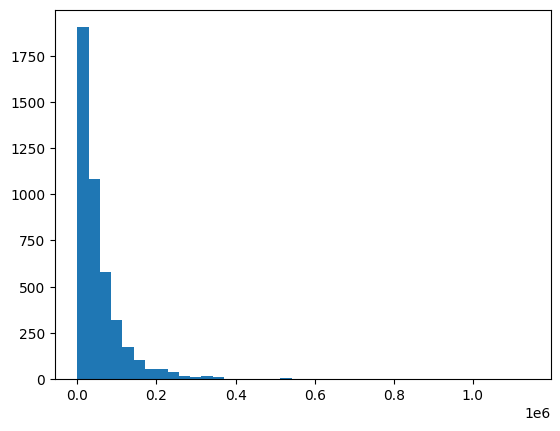

In [156]:
plt.hist(shg_df.Total_loan_amt,bins=40)
plt.show()

### Age vs Total Loan

Relation between these two variables, correlation, scatter plot

<AxesSubplot: xlabel='Total_loan_amt', ylabel='Age'>

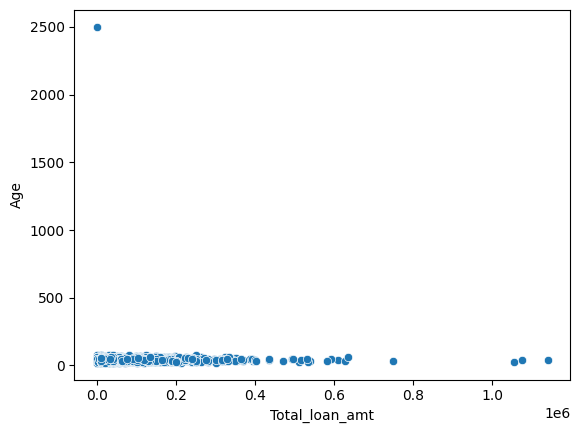

In [162]:
sns.scatterplot(x='Total_loan_amt',y='Age',data=shg_df)

We can see that there is a outlier in the data, which is a typo.

In [163]:
shg_df.Age.describe()

count    4386.000000
mean       41.508436
std        38.517132
min        20.000000
25%        33.000000
50%        40.000000
75%        49.000000
max      2500.000000
Name: Age, dtype: float64

The outlier value is 2500, which is supposed to be 25 yrs.

In [166]:
shg_df.sort_values('Age', ascending=False).head(10)

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
3526,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,1,1,3,3
2404,7,3,39000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,1,1,0,0,1,1,1,1,3,3
1911,2,3,24000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,0,0,0,0,0,1,1,3,3
1199,1,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,1,3,3
3949,2,3,50000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,0,0,0,0,0,0,1,1,1
3157,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,3,3
4230,2,3,30000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,0,0,0,0,0,0,0,3,3
4096,2,3,10000.0,0.0,1.0,0.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,1,1,3,3
3034,5,3,30000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,1,1,3
2154,1,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,0,...,0,1,0,0,0,1,0,0,3,3


In [4]:
shg_df['Age'].at[3526]=25

{'whiskers': [<matplotlib.lines.Line2D at 0x1cba8bdd190>,
 'caps': [<matplotlib.lines.Line2D at 0x1cbaa346110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cbaf368e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1cbaf3429d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cbaf341490>],
 'means': []}

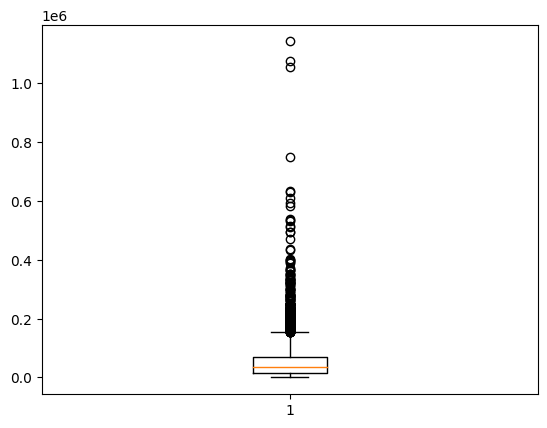

In [7]:
plt.boxplot(shg_df.Total_loan_amt)

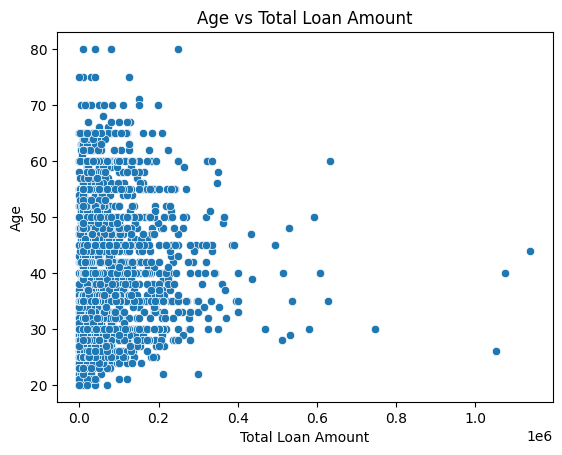

In [10]:
sns.scatterplot(x='Total_loan_amt',y='Age',data=shg_df)
plt.xlabel('Total Loan Amount')
xtick=[0,200000,400000,600000,800000,1000000]
plt.xticks(xtick)
plt.title('Age vs Total Loan Amount')
plt.show()

In [172]:
# Calculating Pearson correlation between both the variables
stats.pearsonr(shg_df.Total_loan_amt,shg_df.Age)

PearsonRResult(statistic=0.0043465256759282886, pvalue=0.7735180901795419)

We can see that there is no linear relationship between both the variables.

In [174]:
# Calculating Spearman correlation between both the varibales
stats.spearmanr(shg_df.Total_loan_amt,shg_df.Age)

SignificanceResult(statistic=0.028035517008924496, pvalue=0.0633765461576024)

Text(0.5, 1.0, 'Age vs Total Loan Amount')

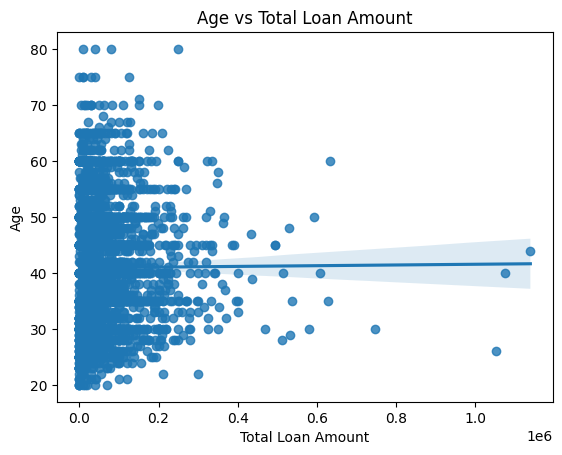

In [11]:
sns.regplot(x='Total_loan_amt',y='Age',data=shg_df)
plt.xlabel('Total Loan Amount')
plt.title('Age vs Total Loan Amount')

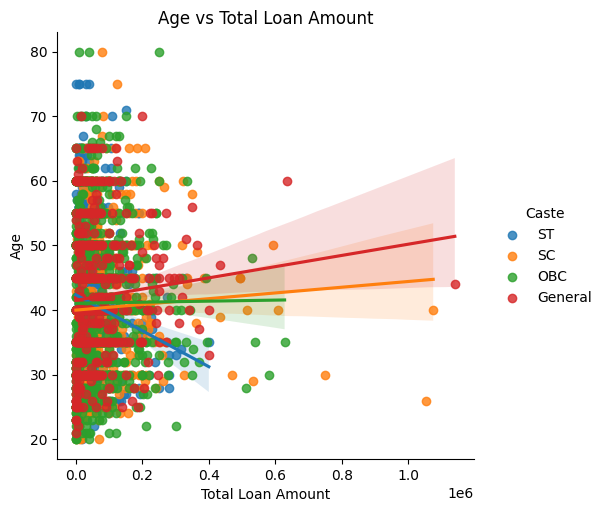

In [22]:
g = sns.lmplot(x='Total_loan_amt',y='Age',data=shg_df,hue='Caste_Category',facet_kws={'legend_out': True})
new_title = 'Caste'
g._legend.set_title(new_title)
new_labels = ['ST', 'SC', 'OBC', 'General']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)


plt.xlabel('Total Loan Amount')
plt.title('Age vs Total Loan Amount')
plt.show(g)

### Age vs Income

<AxesSubplot: xlabel='yearly_income', ylabel='Age'>

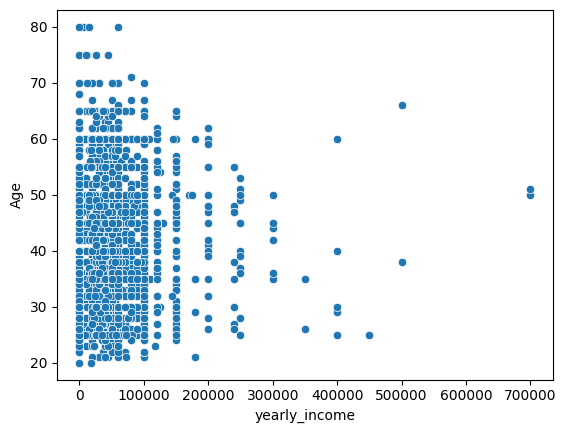

In [5]:
sns.scatterplot(x='yearly_income',y='Age',data=shg_df)

<AxesSubplot: xlabel='yearly_income', ylabel='Age'>

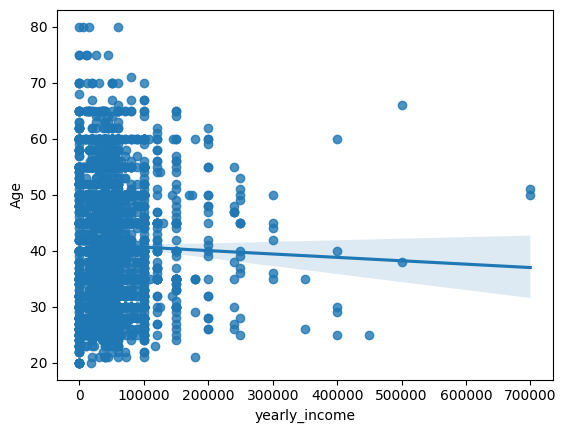

In [6]:
sns.regplot(x='yearly_income',y='Age',data=shg_df)

In [7]:
stats.spearmanr(shg_df.yearly_income,shg_df.Age)

SignificanceResult(statistic=-0.0432894745871039, pvalue=0.004137890428320393)

## Bifurcated

In [5]:
# 5 year
shg_5yrs_df=shg_df[shg_df.Total_yrs_in_shg.between(5,9)]
shg_5yrs_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
2,2,3,30000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,1,1,0,0,1,1,1,1,3,2
4,3,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,0,0,0,0,1,0,1,1,2
5,4,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,0,0,1,1,1,1,2
6,2,3,20000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,0,0,0,0,1,0,1,1,1
8,2,3,25000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,1,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,1,1,3,3
4382,7,3,13850.0,0.0,0.0,0.0,0.0,1.0,0.0,2,...,0,1,0,0,0,1,1,1,2,2
4383,2,3,50000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,1,0,0,0,1,1,1,3,3
4384,3,3,32000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,1,1,1,1,1


In [6]:
# 10 yrs
shg_10yrs_df=shg_df[shg_df.Total_yrs_in_shg>=10]
shg_10yrs_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
166,3,3,50000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,0,0,0,0,1,0,0,1,1
174,3,3,11000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,0,0,0,0,0,1,1,1,1
180,6,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,0,0,0,0,0,1,1
181,3,3,100000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,1,1,1,0,1,1,1
183,2,3,20000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,1,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,5,3,15000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,1
4340,2,3,20000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,1,0,0,1,1
4342,4,3,60000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,1,0,0,1,1
4343,3,3,10000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,1


In [7]:
# less than 5 yrs
shg_4yrs_df=shg_df[shg_df.Total_yrs_in_shg<5]
shg_4yrs_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
0,5,3,15000.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,0,0,1,1,1,3
1,3,3,30000.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,0,0,0,0,0,1,1,1,3,2
3,5,2,15000.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,0,1,0,0,0,0,1,1,1,1
7,3,2,40000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,1,1,1,1,1,1
10,2,3,10000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,1,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,1,3,10000.0,0.0,0.0,0.0,1.0,0.0,0.0,0,...,0,0,0,1,0,0,1,1,3,3
4341,1,3,10000.0,0.0,0.0,0.0,1.0,0.0,0.0,0,...,1,1,1,1,0,0,0,0,1,2
4344,3,3,20000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,0,0,0,0,1,0,0,1,2
4361,2,2,10000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,1,0,1,3,3


In [8]:
shg_10yrs_df.yearly_income.mean()

45034.11974789916

In [9]:
print("The average income for the SHGs less than 5 years old is {}, SHGs between 5 and 10 years is {}, and SHGs older than 10 years is {}".format(shg_4yrs_df.yearly_income.mean(),shg_5yrs_df.yearly_income.mean(),shg_10yrs_df.yearly_income.mean()))

The average income for the SHGs less than 5 years old is 46622.22572509458, SHGs between 5 and 10 years is 50659.36541546359, and SHGs older than 10 years is 45034.11974789916


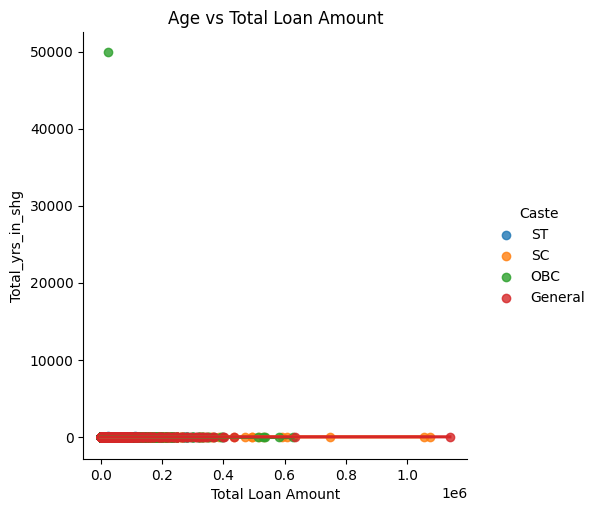

In [10]:
g = sns.lmplot(x='Total_loan_amt',y='Total_yrs_in_shg',data=shg_df,hue='Caste_Category',facet_kws={'legend_out': True})
new_title = 'Caste'
g._legend.set_title(new_title)
new_labels = ['ST', 'SC', 'OBC', 'General']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)


plt.xlabel('Total Loan Amount')
plt.title('Age vs Total Loan Amount')
plt.show(g)

In [11]:
shg_df.sort_values('Total_yrs_in_shg', ascending=False).head(10)

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
2910,1,3,25000.0,0.0,0.0,0.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,1
2475,4,3,21000.0,0.0,1.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,1
2478,2,3,12100.0,1.0,1.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,3
187,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,1,1,1,1
184,1,3,120000.0,0.0,0.0,0.0,1.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,1
183,2,3,20000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,1,1,0,0,0,0,0,1,1,1
180,6,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,0,0,0,0,0,1,1
308,4,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,0,0,0,0,0,0,0,1,1
312,5,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,0,0,0,0,0,0,0,1,1
314,8,3,50000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,0,0,0,1,1,0,0,1,1


In [5]:
shg_df.Total_yrs_in_shg.at[2910]=5

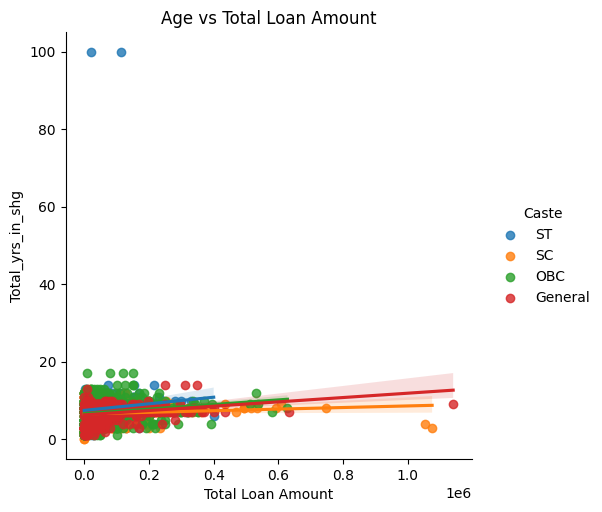

In [13]:
g = sns.lmplot(x='Total_loan_amt',y='Total_yrs_in_shg',data=shg_df,hue='Caste_Category',facet_kws={'legend_out': True})
new_title = 'Caste'
g._legend.set_title(new_title)
new_labels = ['ST', 'SC', 'OBC', 'General']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)


plt.xlabel('Total Loan Amount')
plt.title('Age vs Total Loan Amount')
plt.show(g)

In [14]:
shg_df.sort_values('Total_yrs_in_shg', ascending=False).head(10)

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
2478,2,3,12100.0,1.0,1.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,3
2475,4,3,21000.0,0.0,1.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,1
184,1,3,120000.0,0.0,0.0,0.0,1.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,1
183,2,3,20000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,1,1,0,0,0,0,0,1,1,1
187,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,1,1,1,1
180,6,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,0,0,0,0,0,1,1
204,3,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,0,0,0,0,0,1,1
201,5,3,13000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,1,0,0,0,1,0,1,1,1
308,4,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,0,0,0,0,0,0,0,1,1
203,5,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,1,1,0,0,0,1,0,0,1,1


In [6]:
shg_df.Total_yrs_in_shg.at[2478]=10
shg_df.Total_yrs_in_shg.at[2475]=10

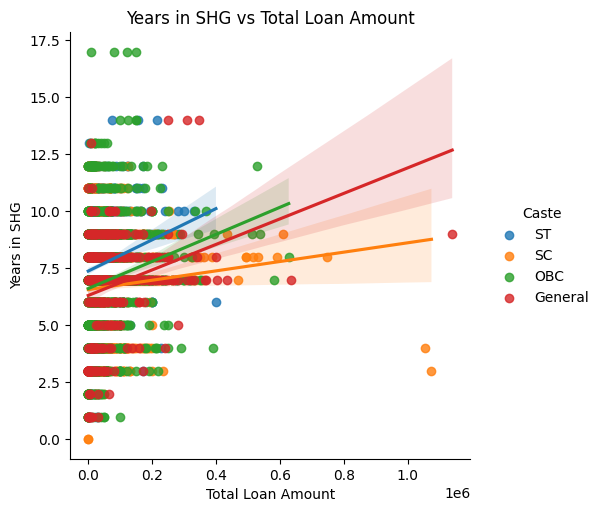

In [16]:
g = sns.lmplot(x='Total_loan_amt',y='Total_yrs_in_shg',data=shg_df,hue='Caste_Category',facet_kws={'legend_out': True})
new_title = 'Caste'
g._legend.set_title(new_title)
new_labels = ['ST', 'SC', 'OBC', 'General']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)


plt.xlabel('Total Loan Amount')
plt.ylabel('Years in SHG')
plt.title('Years in SHG vs Total Loan Amount')
plt.show(g)

Text(0.5, 1.0, 'Years in SHG vs Total Loan Amount')

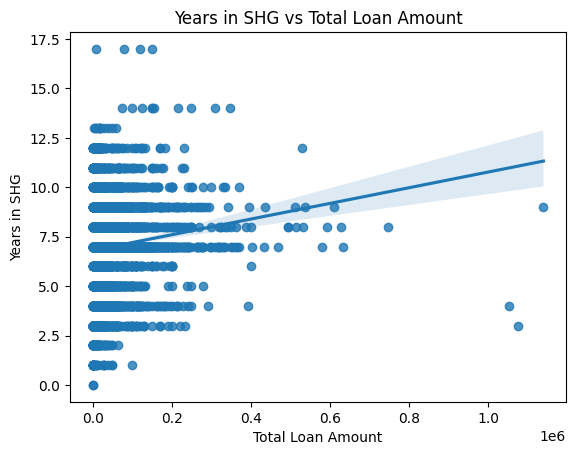

In [17]:
sns.regplot(x='Total_loan_amt',y='Total_yrs_in_shg',data=shg_df)
plt.xlabel('Total Loan Amount')
plt.ylabel('Years in SHG')
plt.title('Years in SHG vs Total Loan Amount')

### 1 lakh loan amount

In [7]:
lakh1_df=shg_df[shg_df.Total_loan_amt>100000]

In [8]:
lakh1_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
12,8,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,1,1,0,0,0,1,1,1,2,2
15,8,3,20000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,1,1,1,1,2
16,4,3,20000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,1,1,1,1,2
22,8,2,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,2,...,0,0,0,0,0,0,1,1,3,3
23,5,2,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,3,3,20000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,0,0,0,0,1,0,0,1,2
4346,2,3,100000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,0,0,0,0,1,0,1,3,3
4378,5,3,25000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,1,0,1,3,3
4379,5,3,18000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,1,1,3,3


<AxesSubplot: xlabel='Total_loan_amt', ylabel='Total_yrs_in_shg'>

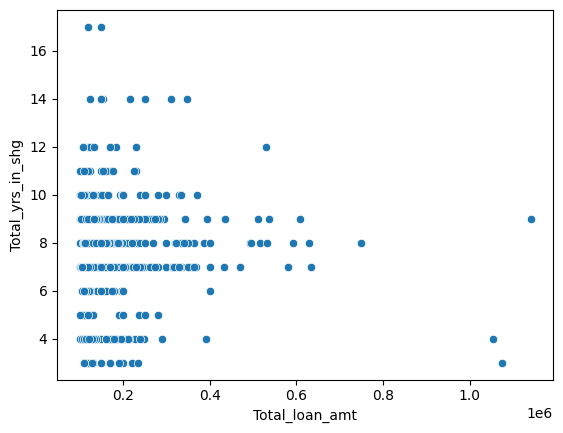

In [20]:
sns.scatterplot(y='Total_yrs_in_shg',x='Total_loan_amt',data=lakh1_df)

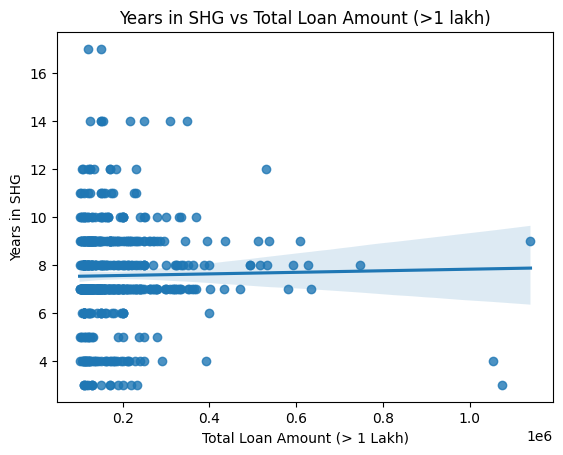

In [21]:
sns.regplot(y='Total_yrs_in_shg',x='Total_loan_amt',data=lakh1_df)
plt.xlabel('Total Loan Amount (> 1 Lakh)')
plt.ylabel('Years in SHG')
plt.title('Years in SHG vs Total Loan Amount (>1 lakh)')
plt.show()

In [22]:
shg_10yrs_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
166,3,3,50000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,0,0,0,0,1,0,0,1,1
174,3,3,11000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,0,0,0,0,0,1,1,1,1
180,6,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,0,0,0,0,0,1,1
181,3,3,100000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,1,1,1,0,1,1,1
183,2,3,20000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,1,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,5,3,15000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,1
4340,2,3,20000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,1,0,0,1,1
4342,4,3,60000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,1,0,0,1,1
4343,3,3,10000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,1


In [23]:
shg_5yrs_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
2,2,3,30000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,1,1,0,0,1,1,1,1,3,2
4,3,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,0,0,0,0,1,0,1,1,2
5,4,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,0,0,1,1,1,1,2
6,2,3,20000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,0,0,0,0,1,0,1,1,1
8,2,3,25000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,1,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,1,1,3,3
4382,7,3,13850.0,0.0,0.0,0.0,0.0,1.0,0.0,2,...,0,1,0,0,0,1,1,1,2,2
4383,2,3,50000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,1,0,0,0,1,1,1,3,3
4384,3,3,32000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,1,1,1,1,1


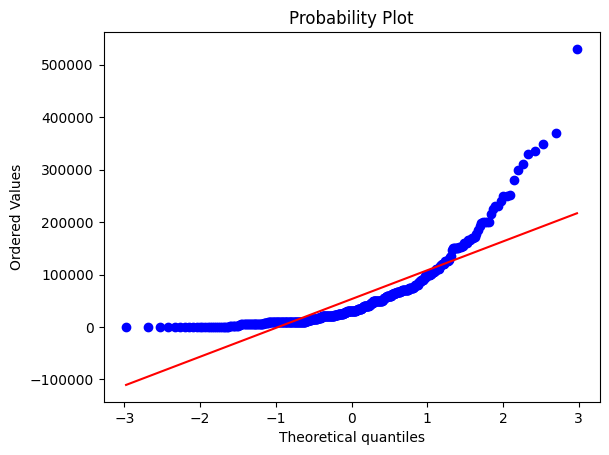

In [24]:
stats.probplot(shg_10yrs_df.Total_loan_amt, dist="norm",plot=plt)
plt.show()

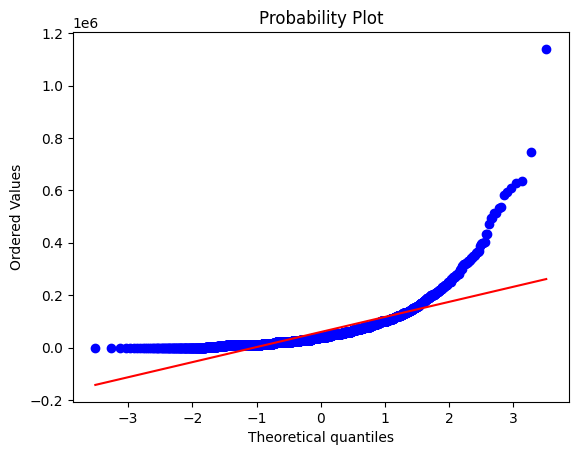

In [25]:
stats.probplot(shg_5yrs_df.Total_loan_amt, dist="norm",plot=plt)
plt.show()

In [26]:
# Non-parametric test for the significant difference in loan amount for shg memnbers of SHGs greater than 10 9 years and
# SHGs between 5 and 9 years old.
s,p=stats.mannwhitneyu(shg_10yrs_df.Total_loan_amt,shg_5yrs_df.Total_loan_amt)
if(p<0.05):
    print("The difference between the total loan amount is significant with p value of {}".format(p))
else:
    print("The difference between the total loan amount is not significant, p value is {}".format(p))

The difference between the total loan amount is significant with p value of 0.0002429797356022473


In [27]:
# Non-parametric test for the significant difference in loan amount for shg memnbers of SHGs less 5 years old and between 5 and 9 years old.
s,p=stats.mannwhitneyu(shg_5yrs_df.Total_loan_amt,shg_4yrs_df.Total_loan_amt)
if(p<0.05):
    print("The difference between the total loan amount is significant with p value of {}".format(p))
else:
    print("The difference between the total loan amount is not significant, p value is {}".format(p))

The difference between the total loan amount is significant with p value of 2.0978518646212406e-54


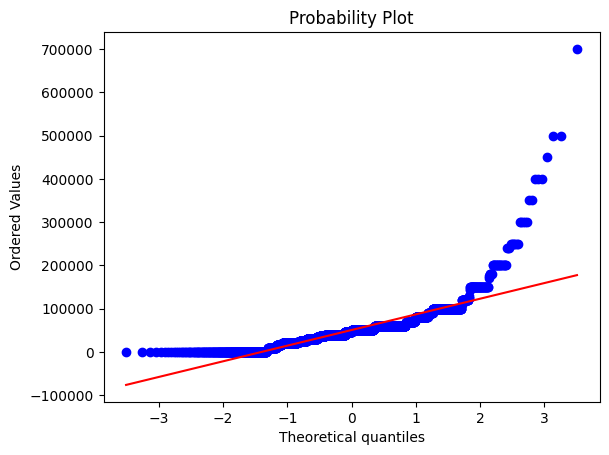

In [28]:
stats.probplot(shg_5yrs_df.yearly_income, dist="norm",plot=plt)
plt.show()

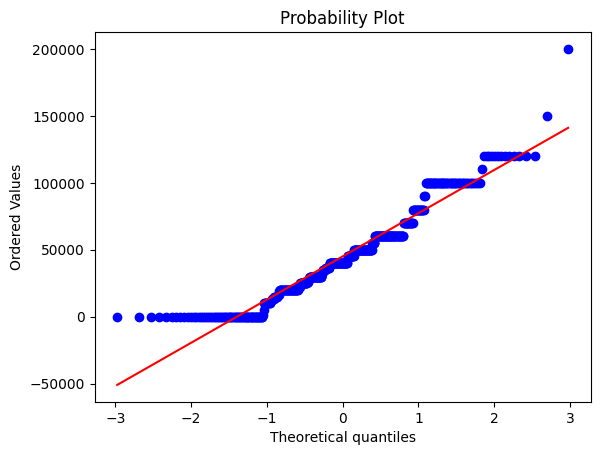

In [29]:
stats.probplot(shg_10yrs_df.yearly_income, dist="norm",plot=plt)
plt.show()

In [30]:
# Parametric two samplet-test for the significant difference in yearly income for shg memnbers of SHGs greater than 9 years old and
# between 5 and 9 years old.
s,p=stats.ttest_ind(shg_10yrs_df.yearly_income, shg_5yrs_df.yearly_income, equal_var=False)
if(p<0.05):
    print("The difference between the total loan amount is significant with p value of {}".format(p))
else:
    print("The difference between the total loan amount is not significant, p value is {}".format(p))

print("The average income for the SHGs older than 9 years is {}, and for the SHGs between 5 and 9 years is {}".
      format(round(np.mean(shg_10yrs_df.yearly_income),2),round(np.mean(shg_5yrs_df.yearly_income),2)))

The difference between the total loan amount is significant with p value of 0.0009670379192887586
The average income for the SHGs older than 9 years is 45034.12, and for the SHGs between 5 and 9 years is 50659.37


In [31]:
# Parametric two samplet-test for the significant difference in yearly income for shg memnbers of SHGs less 5 years old and
# between 5 and 9 years old.
s,p=stats.ttest_ind(shg_4yrs_df.yearly_income, shg_5yrs_df.yearly_income, equal_var=False)
if(p<0.05):
    print("The difference between the total loan amount is significant with p value of {}".format(p))
else:
    print("The difference between the total loan amount is not significant, p value is {}".format(p))

print("The average income for the SHGs which are less than 5 years old is {}, and for the SHGs between 5 and 9 years is {}".
      format(round(np.mean(shg_4yrs_df.yearly_income),2),round(np.mean(shg_5yrs_df.yearly_income),2)))

The difference between the total loan amount is significant with p value of 0.04583778925359848
The average income for the SHGs which are less than 5 years old is 46622.23, and for the SHGs between 5 and 9 years is 50659.37


## 1 Lakh Analysis

In [9]:
lakh1_shg_10yrs_df=lakh1_df[lakh1_df.Total_yrs_in_shg>=10]
lakh1_shg_10yrs_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
181,3,3,100000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,1,0,1,1,1,0,1,1,1
183,2,3,20000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,1,1,0,0,0,0,0,1,1,1
184,1,3,120000.0,0.0,0.0,0.0,1.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,1
190,6,3,50000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,1,1,0,0,1,1,0,1,1,1
193,10,3,50000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,3,3,10000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,0,0,1,3,3
4110,5,3,10000.0,0.0,1.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,1
4111,4,3,13000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,1,0,0,0,1,0,1,1,1
4339,5,3,15000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,1,1


In [15]:
lakh1_shg_5yrs_df=lakh1_df[lakh1_df.Total_yrs_in_shg.between(5,9)]
lakh1_shg_5yrs_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
12,8,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,1,1,0,0,0,1,1,1,2,2
15,8,3,20000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,1,1,1,1,2
16,4,3,20000.0,1.0,0.0,0.0,0.0,0.0,0.0,3,...,0,1,0,0,0,1,1,1,1,2
22,8,2,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,2,...,0,0,0,0,0,0,1,1,3,3
23,5,2,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322,5,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,1,1,1,1,1,1,1,1,3,3
4346,2,3,100000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,0,0,0,0,1,0,1,3,3
4378,5,3,25000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,1,0,1,3,3
4379,5,3,18000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,1,1,3,3


In [16]:
lakh1_shg_4yrs_df=lakh1_df[lakh1_df.Total_yrs_in_shg<5]
lakh1_shg_4yrs_df.head()

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
168,2,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,0,0,0,0,1,1,1,1,1,1
293,3,3,87000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,1,0,0,0,1,0,1,3,3
327,3,3,25000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,1,0,0,0,1,0,0,1,1
339,4,3,20000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,1,1,0,0,1,1,1,1,1,1
354,2,3,40000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,1,0,0,0,1,0,1,1,1


In [17]:
# Parametric two sample t-test for the significant difference in yearly income for shg memnbers (having loan amount graeter than 1 lakh) 
# of SHGs greater than 9 years old and between 5 and 9 years old.
s,p=stats.ttest_ind(lakh1_shg_10yrs_df.yearly_income, lakh1_shg_5yrs_df.yearly_income, equal_var=False)
if(p<0.05):
    print("The difference between the total loan amount is significant with p value of {}".format(p))
else:
    print("The difference between the total loan amount is not significant, p value is {}".format(p))

print("The average income for the SHGs older than 9 years is {}, and for the SHGs between 5 and 9 years is {}".
      format(round(np.mean(lakh1_shg_10yrs_df.yearly_income),2),round(np.mean(lakh1_shg_5yrs_df.yearly_income),2)))

The difference between the total loan amount is not significant, p value is 0.11213112766566066
The average income for the SHGs older than 9 years is 64563.38, and for the SHGs between 5 and 9 years is 72602.94


In [18]:
# Parametric two samplet-test for the significant difference in yearly income for shg memnbers (having loan amount graeter than 1 lakh) 
# of SHGs less 5 years old and between 5 and 9 years old.
s,p=stats.ttest_ind(lakh1_shg_4yrs_df.yearly_income, lakh1_shg_5yrs_df.yearly_income, equal_var=False)
if(p<0.05):
    print("The difference between the total loan amount is significant with p value of {}".format(p))
else:
    print("The difference between the total loan amount is not significant, p value is {}".format(p))

print("The average income for the SHGs which are less than 5 years old is {}, and for the SHGs between 5 and 9 years is {}".
      format(round(np.mean(lakh1_shg_4yrs_df.yearly_income),2),round(np.mean(lakh1_shg_5yrs_df.yearly_income),2)))

The difference between the total loan amount is not significant, p value is 0.9850299730072269
The average income for the SHGs which are less than 5 years old is 72750.0, and for the SHGs between 5 and 9 years is 72602.94


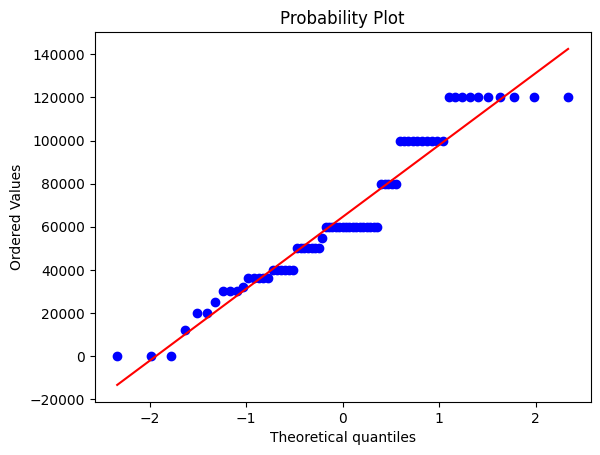

In [19]:
stats.probplot(lakh1_shg_10yrs_df.yearly_income, dist="norm",plot=plt)
plt.show()

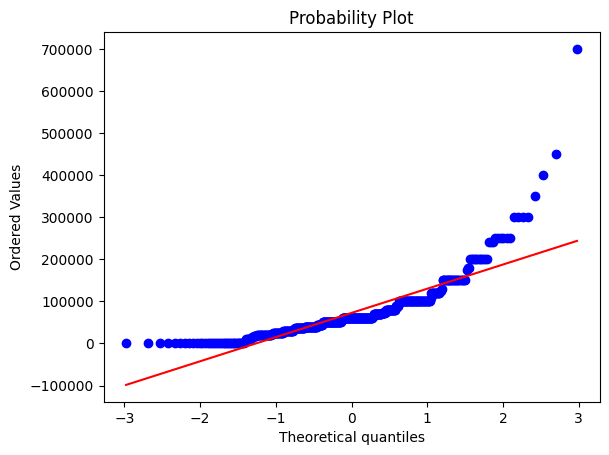

In [20]:
stats.probplot(lakh1_shg_5yrs_df.yearly_income, dist="norm",plot=plt)
plt.show()

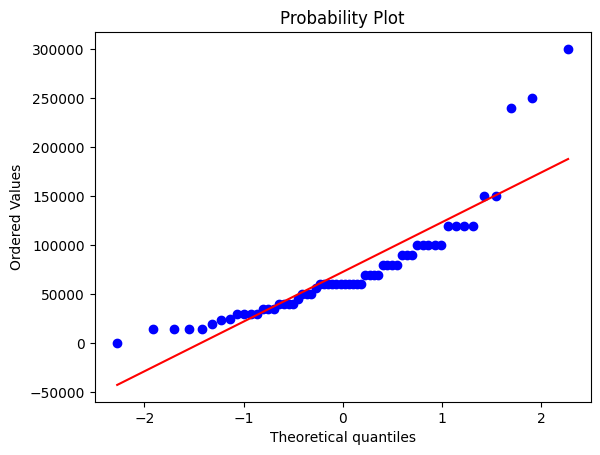

In [21]:
stats.probplot(lakh1_shg_4yrs_df.yearly_income, dist="norm",plot=plt)
plt.show()